In [38]:
import pandas as pd
df = pd.read_csv('train.csv')

In [39]:
print(len(df))

23477


In [40]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

<AxesSubplot:>

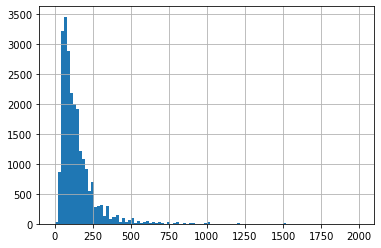

In [41]:
df['price'].hist(bins = 100)

In [42]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
print(len(categories))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    review = to_float(row.review_scores_rating)
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    
    return [guest_num, guest_cap, bedrooms, bathrooms, review] + one_hot

train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    train_X.append(feature)
    train_y.append(price)

print(len(train_X), len(train_y))

5
23477 23477


The first baseline method selects several simple features and then applies the linear regression model.

In [43]:
from sklearn import linear_model
import pandas as pd

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

test_df = pd.read_csv('test.csv')

test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = regr.predict(test_X)

print(len(test_y))

output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('linear_regression_baseline.csv', index = False)

10061


The second baseline method blindly predicts the mean price based on training data for all listings.

In [36]:
import numpy as np

mean = np.mean(list(df['price']))
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = [mean for i in range(len(test_ids))]
output_df.to_csv('mean_value_baseline.csv', index = False)